<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [436]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import normaltest 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


I use the data from here: (Linear Regression E-commerce Dataset)[https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website?resource=download]

In [437]:
data = pd.read_csv('./Ecommerce Customer.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [438]:
# let's see the data shape, dtypes and basic statistics
print(data.shape)

(500, 8)


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [440]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [441]:
data.isnull().sum().T # it seems that there is no missing values 

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [442]:
def parse_city(s):
    sl = s.split("\n")[-1].split(",")
    return  sl[0].strip()

def parse_state(s):
    # rich people live in specific place?
    sl = s.split("\n")[-1].split(",")[-1].strip().split(" ")
    return  sl[0].strip()


def parse_email(s):
    # rich people prefer a specific mail provider? 
    sl = s.split("@")
    return  sl[-1].strip()

In [443]:
data["City"] = data.apply(lambda x: parse_city(x["Address"]), axis=1)
data["State"] = data.apply(lambda x: parse_state(x["Address"]), axis=1)
data["Email"] = data.apply(lambda x: parse_email(x["Email"]), axis=1)

In [444]:
data = data.drop("Address", axis=1)

In [445]:
data.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,City,State
0,fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Wrightmouth,MI
1,hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Diazchester,CA
2,yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Cobbborough,DC
3,gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Port Jason,OH
4,davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Port Jacobville,PR


In [446]:
data.to_csv("cleaned-data.csv", index=True)

In [447]:
data.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,City,State
0,fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Wrightmouth,MI
1,hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Diazchester,CA
2,yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Cobbborough,DC
3,gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Port Jason,OH
4,davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Port Jacobville,PR


In [448]:
def get_train_test_data(data):
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)
    return train_data, test_data

In [449]:
train_data, test_data = get_train_test_data(data)

# 2. Objectives


In [450]:
# Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
# > this model will try to figure out the `Yearly Amount Spent` of a customer

In [451]:
# Brief description of the data set you chose and a summary of its attributes.
#> this is a e-commerce customer data set, the data contains 500 rows and 8 columns and the descriptions are as follows:

# ---  ------                --------------  -----  
#  0   Email                 the email address of a customer, unique values I keep the provider name as a feature 
#  1   Address               the address of a customer and I break the address into city and state  
#  2   Avatar                I do not know what it means and since it contains duplicate values, I keep it 
#  3   Avg. Session Length   average session length of a customer
#  4   Time on App           time on app
#  5   Time on Website       time on website
#  6   Length of Membership  length of membership
#  7   Yearly Amount Spent   the money that a customer spend wich is also the predict target.

In [452]:
# data description
train_data.info() # we can see there has four string features and five numerical features.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 249 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 400 non-null    object 
 1   Avatar                400 non-null    object 
 2   Avg. Session Length   400 non-null    float64
 3   Time on App           400 non-null    float64
 4   Time on Website       400 non-null    float64
 5   Length of Membership  400 non-null    float64
 6   Yearly Amount Spent   400 non-null    float64
 7   City                  400 non-null    object 
 8   State                 400 non-null    object 
dtypes: float64(5), object(4)
memory usage: 31.2+ KB


P-value: 0.2840905512374989


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

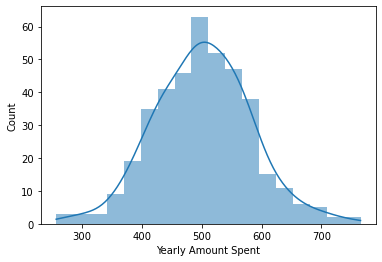

In [453]:
# data transformation: 
# 1. data should not skewed
# 2. the target feature should be normally distributed



_, p = normaltest(train_data["Yearly Amount Spent"])
print(f"P-value: {p}") 
sns.histplot(train_data["Yearly Amount Spent"], kde=True, edgecolor=None)

# we can see that p is bigger than 0.05, which means the data is normally distributed
# from the histogram, we can see that the data is not skewed, lucky!

In [454]:
# dimension feature: the obj like features
# measurement feature: the num like features

dimension_features = train_data.select_dtypes(include='object').columns.to_list()
measurement_features = train_data.select_dtypes(include='float64').columns.to_list()
measurement_features.remove('Yearly Amount Spent')
target = 'Yearly Amount Spent'
print(dimension_features)
print(measurement_features)
print(target)


['Email', 'Avatar', 'City', 'State']
['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
Yearly Amount Spent


In [455]:
measurement_data = train_data[measurement_features].copy()
measurement_data.skew() # if the abs(p) bigger than .75 then the data is skewed
# all the data is not skewed

Avg. Session Length    -0.075898
Time on App            -0.126005
Time on Website        -0.022939
Length of Membership   -0.103952
dtype: float64

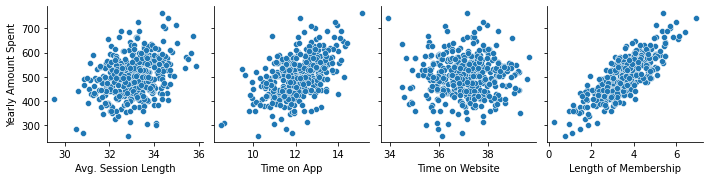

In [456]:
sns.pairplot(x_vars=measurement_features, y_vars=target, data=train_data) 
# it seems that membership is a good feature for this task, it amoust linear with the target

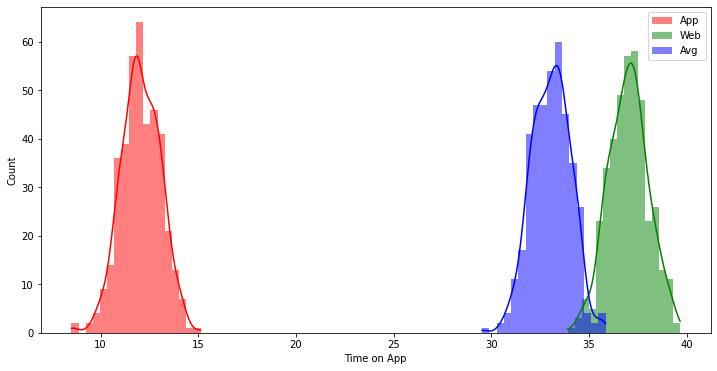

In [457]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(train_data["Time on App"], kde=True, edgecolor=None, ax=ax, alpha=0.5, color='red',label="App")
sns.histplot(train_data["Time on Website"], kde=True, edgecolor=None, ax=ax,  alpha=0.5, color='green',label="Web")
sns.histplot(train_data["Avg. Session Length"], kde=True, edgecolor=None, ax=ax,  alpha=0.5, color='blue',label="Avg")
plt.legend()
plt.show() # customer spend more time on website than on app

(0.0, 60.0)

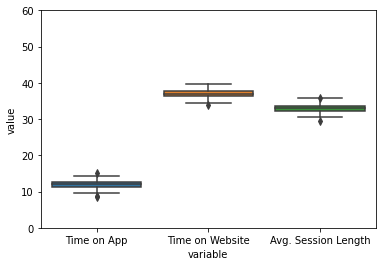

In [458]:
sns.boxplot(x='variable', y='value', data=pd.melt(train_data[['Time on App', 'Time on Website', 'Avg. Session Length', 'Yearly Amount Spent']], id_vars='Yearly Amount Spent'))
plt.gca().set_ylim([0, 60]) # we can see that there has no outliers

<AxesSubplot:>

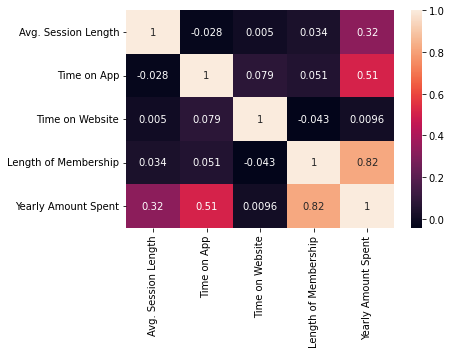

In [459]:
sns.heatmap(train_data.corr(), annot=True)
# the membership and time on app has the highest correlation

In [460]:
# # dimension datas


for d in dimension_features:
    print(train_data[d].value_counts().sort_values(ascending=False).head(10))
    print("---")
    
    


hotmail.com     70
gmail.com       66
yahoo.com       61
williams.com     2
lee.com          2
barber.com       2
edwards.com      2
moore.com        2
johnson.com      2
cortez.com       1
Name: Email, dtype: int64
---
CadetBlue       7
Teal            6
Cyan            6
OliveDrab       6
DarkSeaGreen    6
Wheat           6
Moccasin        5
LemonChiffon    5
SlateBlue       5
Tomato          5
Name: Avatar, dtype: int64
---
North Amanda         2
Lake Matthew         2
New Matthew          2
Ramirezberg          2
APO AE 15445-2876    1
North Tracy          1
Allentown            1
Wattsbury            1
Port Laura           1
East Amberhaven      1
Name: City, dtype: int64
---
DPO    14
SC     13
DE     13
OR     12
FPO    11
MS     11
APO    10
MO     10
VT     10
KS      9
Name: State, dtype: int64
---


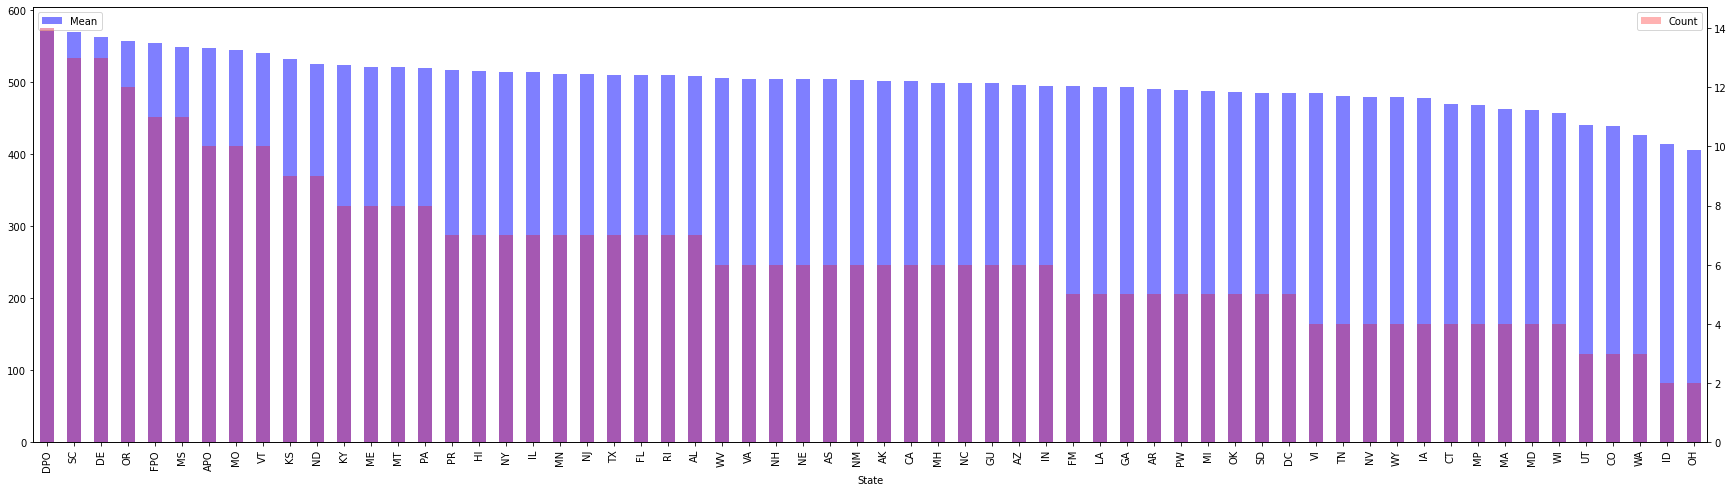

In [461]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
train_data.groupby(by=["State"])['Yearly Amount Spent'].mean().sort_values(ascending=False).plot(
    kind="bar", figsize=(30, 8),ax=ax, alpha=0.5,color="b", label="Mean")
train_data["State"].value_counts().sort_values(ascending=False).plot(
    kind="bar", figsize=(30, 8),ax=ax2, alpha=0.3,color="r",label="Count")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show() # it shows that some customers intended to take high value order.
# we will use state as a feature

In [462]:
df_mean = train_data.groupby(by=["State"])['Yearly Amount Spent'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={"State":"index"})
df_cnt = train_data["State"].value_counts().sort_values(ascending=False).to_frame().reset_index()

df_mean_pre_cnt = pd.merge(left=df_mean, right=df_cnt, how="inner", on="index")
df_mean_pre_cnt["mean_per_cnt"] = df_mean_pre_cnt["Yearly Amount Spent"] / df_mean_pre_cnt["State"]
df_mean_pre_cnt.head()

,index,Yearly Amount Spent,State,mean_per_cnt
0,MP,575.414301,4,143.853575
1,IN,569.889622,6,94.981604
2,MN,563.113170,7,80.444739
3,AR,557.326825,5,111.465365
4,UT,554.268144,3,184.756048


In [463]:
mean_per_cnt_dict = {k:v for k,v in zip(df_mean_pre_cnt["index"], df_mean_pre_cnt["mean_per_cnt"]) }
# add feature mean_per_cnt
train_data["mean_per_cnt"] = train_data.apply(lambda x:mean_per_cnt_dict[x["State"]], axis=1) 

In [464]:
# encoding the email data 
def process_email(s:str):
    if s in ["hotmail.com","gmail.com","yahoo.com"]:
        return s
    else:
        return "other.com"

In [465]:
# combine these process to a function
def precess_data(df, oht, test:bool=False):
    df["mean_per_cnt"] = df.apply(lambda x:mean_per_cnt_dict[x["State"]], axis=1)
    df["Email_encod"] = df["Email"].apply(process_email)
    if test:
        df_oht = oht.transform(df["Email_encod"].values.reshape(-1,1))
    else:
        df_oht = oht.fit_transform(df["Email_encod"].values.reshape(-1,1)) # oht  
    df[oht.get_feature_names_out().tolist()] = df_oht.toarray()
    return df.drop(columns=["Email","Avatar","City","State","Email_encod"], axis=1)

# 3. Linear Regression Models


In [466]:
train_data.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,City,State,mean_per_cnt
249,hotmail.com,Teal,33.780157,11.917636,36.844734,3.634996,518.786483,APO AA 49814,APO,47.926662
433,williamson-boyd.org,Lavender,34.278248,11.822722,36.308545,2.117383,434.144202,Rogerschester,IL,71.331974
19,love-west.net,LightSeaGreen,32.617856,13.989593,37.190504,4.064549,605.061039,North Johnview,MT,66.556874
322,gmail.com,LightSalmon,33.264632,10.732131,36.145792,4.086566,478.262126,New Caleb,PA,60.705320
332,gmail.com,MediumVioletRed,33.144234,11.737041,37.935189,2.190132,424.202827,South Patrickfort,MD,126.678324


In [467]:
# one hot encoding for the category col Email_encod

oht = OneHotEncoder()

train_data_clean = precess_data(df=train_data, oht=oht)
test_data_clean = precess_data(df=test_data, oht=oht, test=True)




In [468]:
y = train_data_clean["Yearly Amount Spent"]
X = train_data_clean.drop("Yearly Amount Spent", axis=1)

In [469]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,mean_per_cnt,x0_gmail.com,x0_hotmail.com,x0_other.com,x0_yahoo.com
249,33.780157,11.917636,36.844734,3.634996,47.926662,0.0,1.0,0.0,0.0
433,34.278248,11.822722,36.308545,2.117383,71.331974,0.0,0.0,1.0,0.0
19,32.617856,13.989593,37.190504,4.064549,66.556874,0.0,0.0,1.0,0.0
322,33.264632,10.732131,36.145792,4.086566,60.705320,1.0,0.0,0.0,0.0
332,33.144234,11.737041,37.935189,2.190132,126.678324,1.0,0.0,0.0,0.0


In [470]:
x_sacler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_sacler.fit_transform(X)
y_train = y_scaler.fit_transform(y.to_numpy().reshape(-1,1))

In [471]:
test_y = test_data_clean["Yearly Amount Spent"]
test_X = test_data_clean.drop("Yearly Amount Spent", axis=1)

y_test = y_scaler.transform(test_y.to_numpy().reshape(-1,1))
X_test = x_sacler.transform(test_X)

In [472]:
lr = LinearRegression().fit(X_train, y_train)
print(f"Training Score: {lr.score(X_train, y_train)}")
yhat = lr.predict(X_test)
y_predict = y_scaler.inverse_transform(yhat)
y_test = y_scaler.inverse_transform(y_test)
print(f"Test Error: {mean_squared_error(y_predict, y_test)}")

Training Score: 0.9855422125864373
Test Error: 112.48788448969616


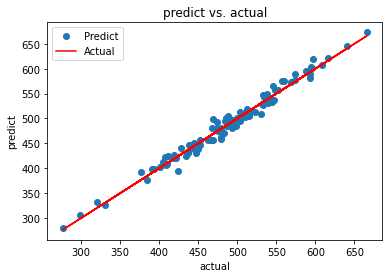

In [473]:
plt.plot(y_test,y_predict, 'o', label="Predict") # it seems that the model is fine.
plt.plot(y_test,y_test, 'r',label="Actual")
plt.title("predict vs. actual")
plt.ylabel("predict")
plt.xlabel("actual")
plt.legend()
plt.show()

In [474]:
# we use pipeline with ridge and lasso

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures


In [475]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() )]
pipe = Pipeline(Input)

alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
lasso_train, lasso_test = get_train_test_data(data=data)
lasso_train_x = lasso_train.drop("Yearly Amount Spent", axis=1)
lasso_train_y = lasso_train["Yearly Amount Spent"]

lasso_test_x = lasso_test.drop("Yearly Amount Spent", axis=1)
lasso_test_y = lasso_test["Yearly Amount Spent"]

lasso_X_clean = precess_data(df=lasso_train_x, oht=oht, test=False)

X = pipe.fit_transform(lasso_X_clean)
y = y_scaler.transform(lasso_train_y.values.reshape(-1,1))


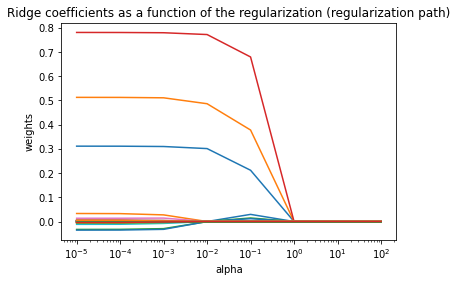

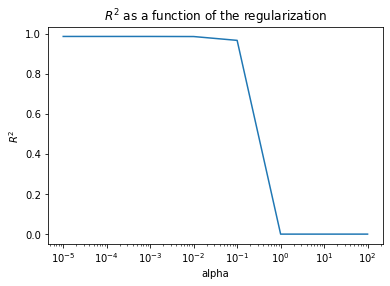

In [476]:

R_2=[]
coefs = []
for alpha in alphas:
    lr = Lasso(alpha=alpha, tol = 0.2)
    lr.fit(X, y)
    R_2.append(lr.score(X, y))
    coefs.append(lr.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()  

In [477]:
# we can find that the best alpha is 0.01 or 0.1, let test then in the test data.
for i,j in zip(alphas, R_2):
    print(f"{i}: {j}")

1e-05: 0.9856273362421186
0.0001: 0.9856259291492546
0.001: 0.9855894385154176
0.01: 0.9851500734888022
0.1: 0.9660219586334936
1: 0.0
10: 0.0
100: 0.0


In [478]:
lr = Lasso(alpha=0.1, tol = 0.2).fit(X, y)
print(f"{lr.score(X, y)}")
lasso_test_x_clean = precess_data(df=lasso_test_x, oht=oht, test=True)
test_X = pipe.transform(lasso_test_x_clean)
yhat = y_scaler.inverse_transform(lr.predict(test_X).reshape(-1,1))
print(f"MSE: {mean_squared_error(yhat, lasso_test_y)}")

0.9660219586334936
MSE: 216.52131829404755


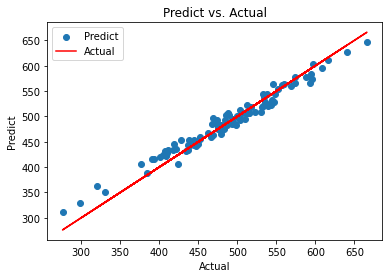

In [479]:
plt.scatter(lasso_test_y,yhat, label="Predict")
plt.plot(lasso_test_y,lasso_test_y,color='r', label="Actual")
plt.title("Predict vs. Actual")
plt.ylabel("Predict")
plt.xlabel("Actual")
plt.legend()
plt.show()

In [480]:
lr.coef_ # even we set pf's degree=2, the regulation term still force most of the coef equal to 0

array([ 0.211616  ,  0.37771821,  0.        ,  0.67932173,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.02946107,  0.        ,  0.01458849,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.01168301,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ])

In [481]:
# finally, we let gridcv to find the best alpha

from sklearn.model_selection import GridSearchCV

pipe = Pipeline(
    [ 
     ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
     ('ss',StandardScaler() ), 
     ('model',Ridge(alpha=1))
     ]
    )

param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}



In [482]:
train_data, test_data = get_train_test_data(data=data)

oht = OneHotEncoder()
scaler = StandardScaler()
X_train = precess_data(df=train_data.drop("Yearly Amount Spent", axis=1), oht=oht, test=False)
y_train = scaler.fit_transform(train_data["Yearly Amount Spent"].values.reshape(-1,1))



In [483]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4, 5]})

In [484]:
search.best_params_

{'model__alpha': 1, 'polynomial__degree': 1}

In [485]:
model = search.best_estimator_

In [486]:
X_test = precess_data(df=test_data.drop("Yearly Amount Spent", axis=1), oht=oht, test=True)
yhat = model.predict(X_test)
y_predict = scaler.inverse_transform(yhat)
print(f"MSE: {mean_squared_error(y_predict, test_data['Yearly Amount Spent'])}")


MSE: 112.00279771676168


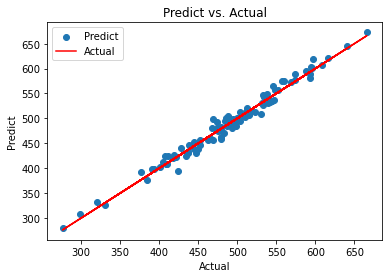

In [487]:
plt.scatter(test_data['Yearly Amount Spent'],y_predict, label="Predict")
plt.plot(test_data['Yearly Amount Spent'],test_data['Yearly Amount Spent'],color='r', label="Actual")
plt.title("Predict vs. Actual")
plt.ylabel("Predict")
plt.xlabel("Actual")
plt.legend()
plt.show()

In [488]:
model["model"].coef_

array([[ 3.11086784e-01,  4.75552876e-01,  4.60298640e-03,
         7.82073043e-01,  9.54380944e-03,  3.63105053e-03,
         1.12117871e-04, -7.76723791e-04, -2.78732868e-03]])

<AxesSubplot:xlabel='coef'>

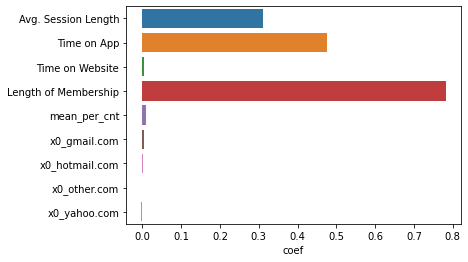

In [493]:
df_coef = pd.DataFrame(data=model["model"].coef_[0], columns=["coef"], index=X_train.columns)

sns.barplot(x="coef", y=df_coef.index, data=df_coef)

# 4. Insights and key findings


In [494]:
# the feature `Length of Membership`, `Time On App` and `Avg. Session Length` are the most important features
# the feature `mean_per_cnt` I created is not as important as I thought

# 5. Next Steps


In [ ]:
# maybe try other models?

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
